In [1]:
import pandas as pd # Data Proccessing 
import numpy as np #Array Processing
import seaborn as sns # Heatmaps
import matplotlib.pyplot as plt # Plotting the graph
from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler # For Scaling
from imblearn.over_sampling import RandomOverSampler # Oversampling


In [2]:
test = pd.read_csv("/kaggle/input/chronic-kidney-disease/kidney_disease_test.csv")
train = pd.read_csv("/kaggle/input/chronic-kidney-disease/kidney_disease_train.csv")

In [3]:
train

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,157,62.0,70.0,1.025,3.0,0.0,normal,abnormal,notpresent,notpresent,...,39.0,7900,3.9,yes,yes,no,good,no,no,ckd
1,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
2,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
3,347,43.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7200,5.5,no,no,no,good,no,no,notckd
4,24,42.0,100.0,1.015,4.0,0.0,normal,abnormal,notpresent,present,...,39.0,8300,4.6,yes,no,no,poor,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,71,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,...,28.0,14600,3.2,yes,yes,no,good,no,no,ckd
276,106,50.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,17.0,6500,NaN,yes,yes,no,good,yes,yes,ckd
277,270,23.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,41.0,7200,5.0,no,no,no,good,no,no,notckd
278,348,38.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7300,6.4,no,no,no,good,no,no,notckd


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              280 non-null    int64  
 1   age             275 non-null    float64
 2   bp              271 non-null    float64
 3   sg              244 non-null    float64
 4   al              245 non-null    float64
 5   su              242 non-null    float64
 6   rbc             173 non-null    object 
 7   pc              230 non-null    object 
 8   pcc             276 non-null    object 
 9   ba              276 non-null    object 
 10  bgr             247 non-null    float64
 11  bu              266 non-null    float64
 12  sc              268 non-null    float64
 13  sod             213 non-null    float64
 14  pot             212 non-null    float64
 15  hemo            241 non-null    float64
 16  pcv             229 non-null    float64
 17  wc              203 non-null    obj

In [5]:
train.dropna(inplace = True)

In [6]:
for i in train.columns:
  print("####################################")
  print("The unique values of feature" , i ,  "are" , train[i].unique())

####################################
The unique values of feature id are [157 347 351 311 258 229 265 307 291 196 284 333 275 398 375 286 353 377
 147  92 326 144 198 317 371 340 337 354 282  11 325 327 299 368 277 384
 362 253 392 357 360 379 127  74 389 249 296 133 367 242 159 318 272 298
 304 310 254 331 256 358 226 341 213 171 267 356  27 260 370 128  14 366
 323 279 212 364 251 390 269 190 259 263  91 339 345 264 393 306 383 189
 397  58  48 344 252 313 343 257 308 130 359 372 399  20  71 270 348]
####################################
The unique values of feature age are [62. 43. 29. 56. 42. 59. 50. 47. 49. 33. 23. 52. 17. 70. 71. 39. 64. 60.
 58. 28. 32. 44. 20. 63. 30. 73. 46. 57. 66. 35. 41. 68. 69. 61. 34. 51.
 55. 83. 48. 24. 40. 25.  6. 45. 22. 80. 12. 37. 38. 74. 72.]
####################################
The unique values of feature bp are [ 70.  60.  80.  50. 100.  90.]
####################################
The unique values of feature sg are [1.025 1.02  1.01  1.015 1.005]


In [7]:
train.replace(to_replace = "\tno" , value = "no" , inplace = True)

In [8]:
train.replace(to_replace = "\tyes" , value = "yes" , inplace = True)

In [9]:
train.replace(to_replace = "\t?" , value = "4500" , inplace = True)

In [10]:
train.replace(to_replace = "\t8400" , value = "8400" , inplace = True)

In [11]:
train["rbc"] = (train["rbc"] == "normal").astype(int)
train["pc"] = (train["pc"] == "normal").astype(int)
train["pcc"] = (train["pcc"] == "present").astype(int)
train["ba"] = (train["ba"] == "present").astype(int)
train["htn"] = (train["htn"] == "yes").astype(int)
train["dm"] = (train["dm"] == "yes").astype(int)
train["cad"] = (train["cad"] == "yes").astype(int)
train["appet"] = (train["appet"] == "good").astype(int)
train["pe"] = (train["pe"] == "yes").astype(int)
train["ane"] = (train["ane"] == "yes").astype(int)
train["classification"] = (train["classification"] == "ckd").astype(int)

In [12]:
train["wc"].astype(float)

0       7900.0
3       7200.0
6       9900.0
10      7500.0
12      8400.0
        ...   
272     6800.0
273     9200.0
275    14600.0
277     7200.0
278     7300.0
Name: wc, Length: 107, dtype: float64

In [13]:
train["rc"].astype(float)

0      3.9
3      5.5
6      4.7
10     5.6
12     5.5
      ... 
272    6.1
273    3.2
275    3.2
277    5.0
278    6.4
Name: rc, Length: 107, dtype: float64

In [14]:
train.dropna(inplace = True)

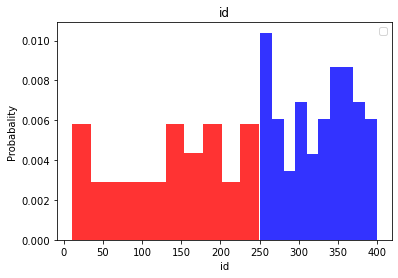

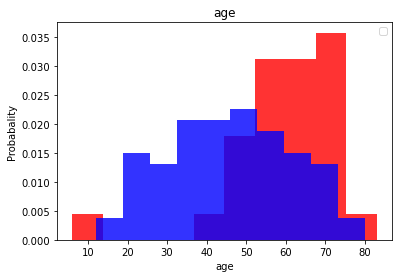

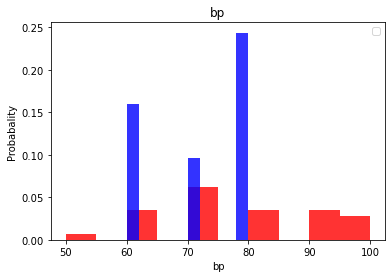

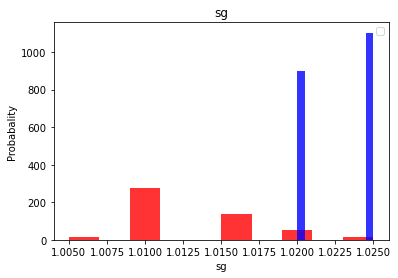

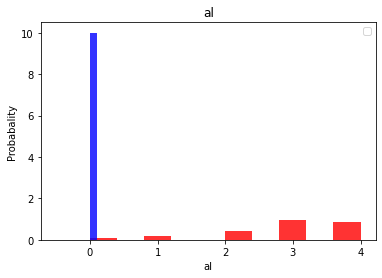

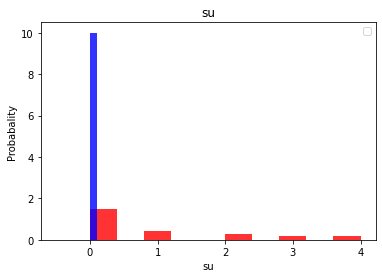

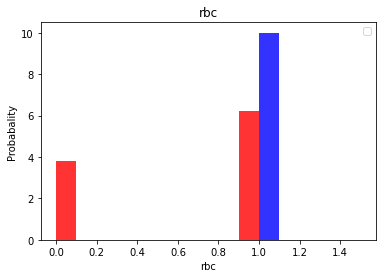

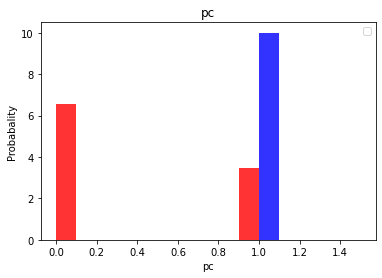

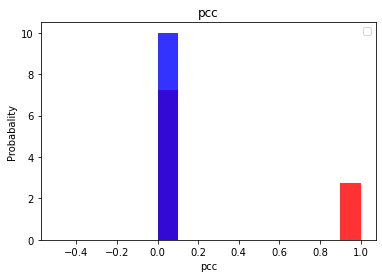

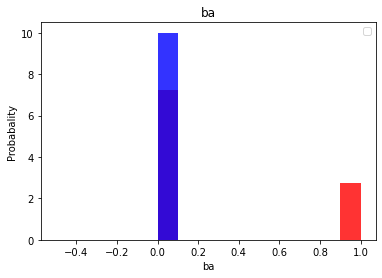

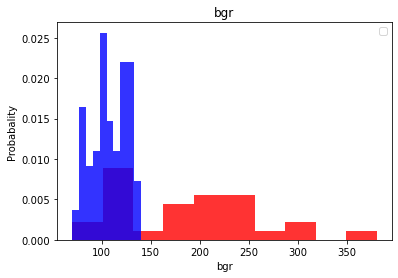

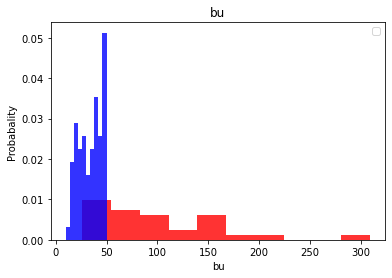

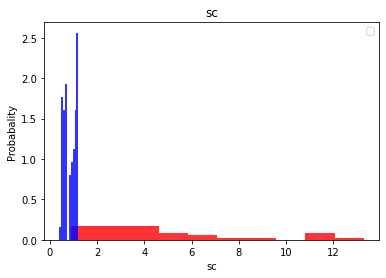

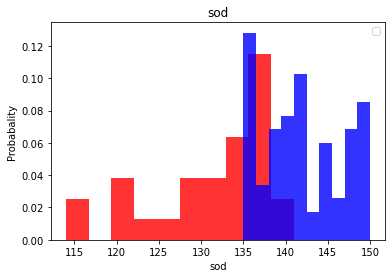

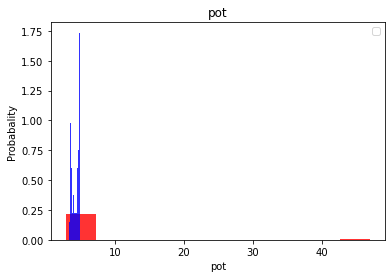

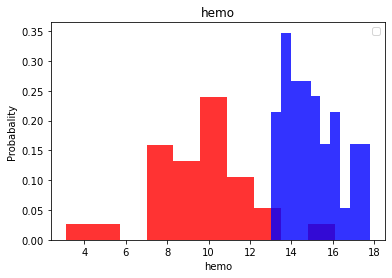

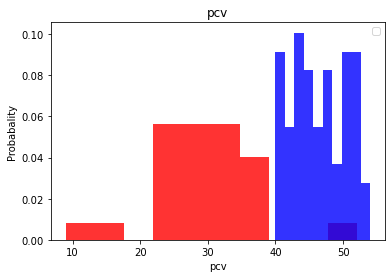

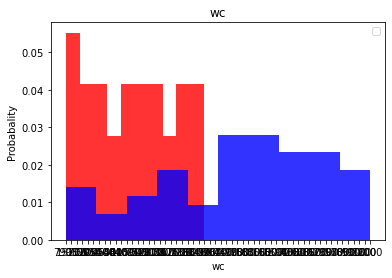

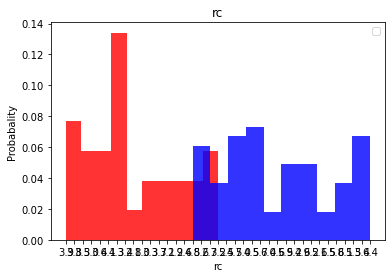

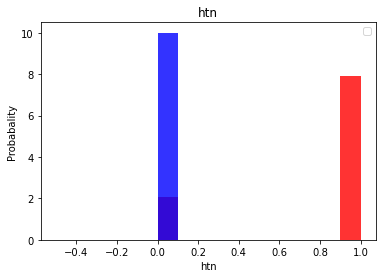

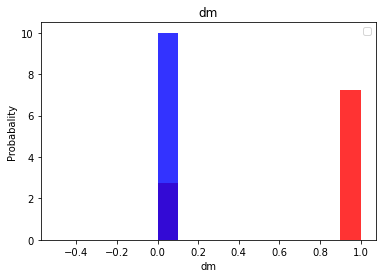

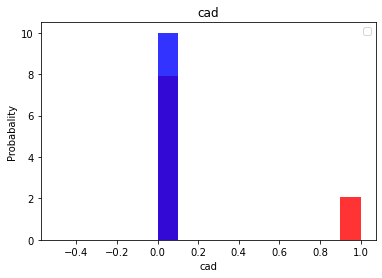

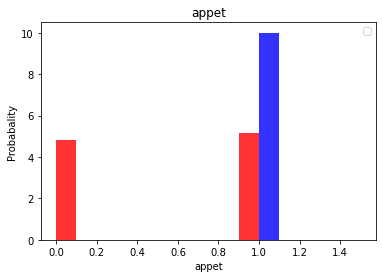

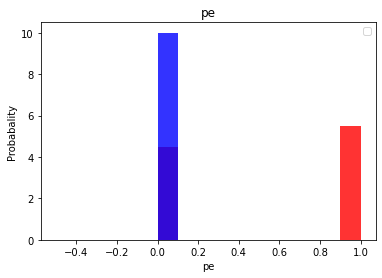

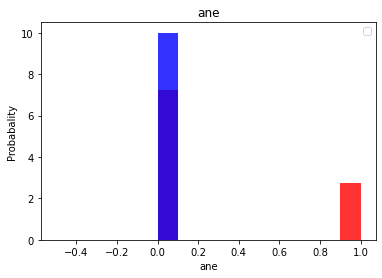

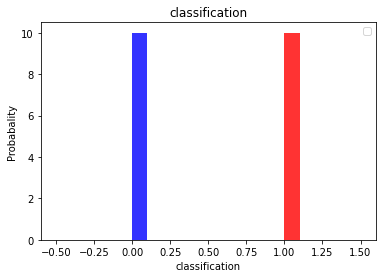

In [15]:
for i in train.columns:
    plt.hist(train[train["classification"] == 1][i] , color = "red" , alpha = 0.8 , density = True)
    plt.hist(train[train["classification"] == 0][i] , color = "blue" , alpha = 0.8 , density = True)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Probabality')
    plt.legend()
    plt.show()

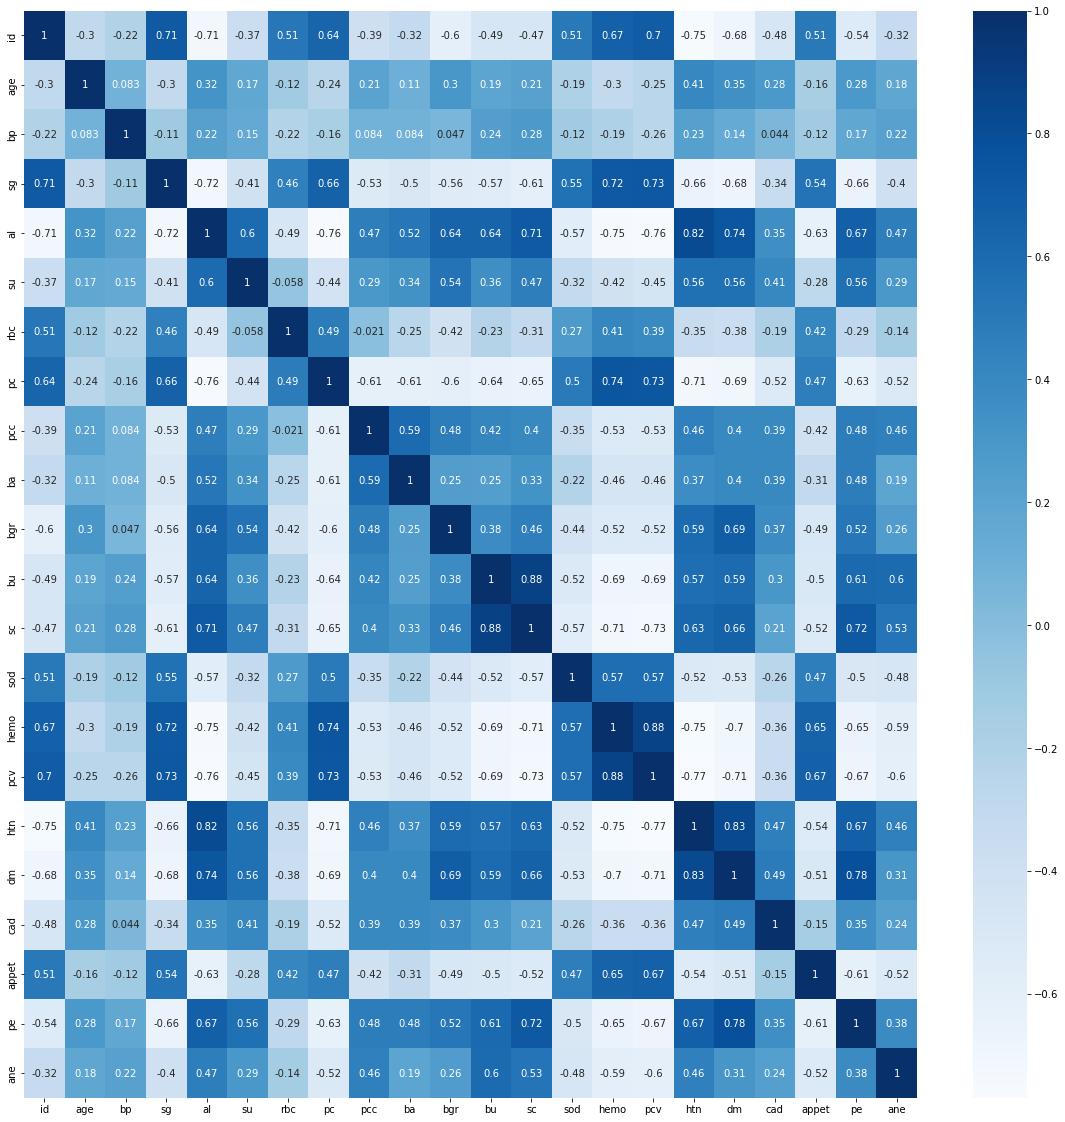

In [16]:
cor = train.corr()
cor_target = abs(cor['classification'])
relevant = cor_target[cor_target > 0.2]
names = [index for index , value in relevant.iteritems()]
names.remove("classification")
plt.figure(figsize = (20 , 20))
new_cor = train[names].corr()
sns.heatmap(new_cor , annot = True , cmap = plt.cm.Blues)
plt.show()


In [17]:
test 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,209,19.0,70.0,1.020,0.0,0.0,NaN,normal,notpresent,notpresent,...,11.5,NaN,6900.0,NaN,no,no,no,good,no,no
1,280,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,13.3,52,8100.0,5.2,no,no,no,good,no,no
2,33,60.0,100.0,1.020,2.0,0.0,abnormal,abnormal,notpresent,notpresent,...,10.1,29,NaN,NaN,yes,no,no,poor,no,no
3,210,59.0,100.0,1.015,4.0,2.0,normal,normal,notpresent,notpresent,...,7.3,20,9800.0,3.9,yes,yes,yes,good,no,yes
4,93,73.0,100.0,1.010,3.0,2.0,abnormal,abnormal,present,notpresent,...,9.2,30,7000.0,3.2,yes,yes,yes,poor,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,60,67.0,90.0,1.020,1.0,0.0,NaN,abnormal,present,notpresent,...,NaN,NaN,NaN,NaN,yes,no,no,good,no,no
116,79,56.0,80.0,1.010,1.0,0.0,NaN,normal,notpresent,notpresent,...,13.5,40,11800.0,5.0,yes,yes,no,poor,yes,no
117,285,66.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,16.0,41,5300.0,5.9,no,no,no,good,no,no
118,305,41.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,17.1,41,9100.0,5.2,no,no,no,good,no,no


In [18]:
test["rbc"] = (test["rbc"] == "normal").astype(int)
test["pc"] = (test["pc"] == "normal").astype(int)
test["pcc"] = (test["pcc"] == "present").astype(int)
test["ba"] = (test["ba"] == "present").astype(int)
test["htn"] = (test["htn"] == "yes").astype(int)
test["dm"] = (test["dm"] == "yes").astype(int)
test["cad"] = (test["cad"] == "yes").astype(int)
test["appet"] = (test["appet"] == "good").astype(int)
test["pe"] = (test["pe"] == "yes").astype(int)
test["ane"] = (test["ane"] == "yes").astype(int)

In [19]:
test.dropna(inplace = True)

In [20]:
train["wc"].astype(int)

0       7900
3       7200
6       9900
10      7500
12      8400
       ...  
272     6800
273     9200
275    14600
277     7200
278     7300
Name: wc, Length: 107, dtype: int64

In [21]:
train["rc"].astype(float)

0      3.9
3      5.5
6      4.7
10     5.6
12     5.5
      ... 
272    6.1
273    3.2
275    3.2
277    5.0
278    6.4
Name: rc, Length: 107, dtype: float64

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 3 to 119
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      72 non-null     int64  
 1   age     72 non-null     float64
 2   bp      72 non-null     float64
 3   sg      72 non-null     float64
 4   al      72 non-null     float64
 5   su      72 non-null     float64
 6   rbc     72 non-null     int64  
 7   pc      72 non-null     int64  
 8   pcc     72 non-null     int64  
 9   ba      72 non-null     int64  
 10  bgr     72 non-null     float64
 11  bu      72 non-null     float64
 12  sc      72 non-null     float64
 13  sod     72 non-null     float64
 14  pot     72 non-null     float64
 15  hemo    72 non-null     float64
 16  pcv     72 non-null     object 
 17  wc      72 non-null     float64
 18  rc      72 non-null     float64
 19  htn     72 non-null     int64  
 20  dm      72 non-null     int64  
 21  cad     72 non-null     int64  
 22  app

In [23]:
test["pcv"].unique()

array(['20', '30', '22', '48', '36', '41', '37', '29', '54', '33', '44',
       '53', '52', '34', '24', '42', '35', '43', '47', '50', '40', '51',
       '32', '38', '45', '39', '46', '26', '23'], dtype=object)

In [24]:
test["pcv"].astype(int)

3      20
4      30
5      22
6      48
7      36
       ..
113    43
114    45
117    41
118    41
119    41
Name: pcv, Length: 72, dtype: int64

In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 3 to 119
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      72 non-null     int64  
 1   age     72 non-null     float64
 2   bp      72 non-null     float64
 3   sg      72 non-null     float64
 4   al      72 non-null     float64
 5   su      72 non-null     float64
 6   rbc     72 non-null     int64  
 7   pc      72 non-null     int64  
 8   pcc     72 non-null     int64  
 9   ba      72 non-null     int64  
 10  bgr     72 non-null     float64
 11  bu      72 non-null     float64
 12  sc      72 non-null     float64
 13  sod     72 non-null     float64
 14  pot     72 non-null     float64
 15  hemo    72 non-null     float64
 16  pcv     72 non-null     object 
 17  wc      72 non-null     float64
 18  rc      72 non-null     float64
 19  htn     72 non-null     int64  
 20  dm      72 non-null     int64  
 21  cad     72 non-null     int64  
 22  app

In [26]:
X_train = train.drop("classification" , axis = 1)
Y_train = train["classification"]

In [27]:
model_0 = KNeighborsClassifier()
model_0.fit(X_train , Y_train)
model_0.predict(test)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [28]:
model_1 = KNeighborsRegressor()
model_1.fit(X_train , Y_train)
model_1.predict(test)

array([0.4, 0.2, 0.2, 0.2, 0.8, 0. , 0.2, 0.8, 0. , 0.2, 0. , 0. , 0. ,
       0.2, 0.2, 0. , 0.2, 0.2, 0.8, 0. , 0. , 0.2, 0. , 0. , 0.2, 0.2,
       0. , 1. , 0.2, 0.2, 0.2, 0. , 0.2, 0. , 0.4, 0.2, 1. , 0. , 0. ,
       0.4, 0.4, 0. , 0. , 0.2, 0.4, 0. , 0.2, 0.2, 0.6, 0. , 0.2, 0.6,
       0.2, 0.2, 0. , 0.2, 0.4, 0. , 0. , 0. , 0. , 0.4, 1. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0.2])

In [29]:
model_2 = LinearRegression()
model_2.fit(X_train , Y_train)
model_2.predict(test)

array([ 1.05193839,  1.10297112,  0.68876865, -0.0461133 ,  0.8486363 ,
        0.09040029,  0.71858661,  1.33495416, -0.06355067,  0.81407963,
        0.10643645, -0.07806406, -0.04751405,  0.85278989,  1.14774938,
       -0.13755538,  0.03268126, -0.08544288,  1.5092363 ,  0.10117217,
       -0.06548732,  0.06772892,  0.04417396,  0.0974434 ,  1.16341144,
        0.93891387, -0.09935639,  0.58993847,  1.01454666,  0.66515935,
        0.0840611 , -0.04159178,  0.96554602, -0.03586574,  1.04686675,
        0.90011537,  0.83941995,  0.08138564,  0.03725784,  0.88342188,
        0.79200815,  0.00900895,  0.03994701,  0.05601607,  0.98827071,
       -0.03719685,  1.00702381,  0.07344802,  0.95421165,  0.0354229 ,
        0.98393054,  0.83936444,  0.10241954,  0.84348185, -0.02164214,
        0.45006761,  0.73105371,  0.11369735,  0.03241892,  0.00209536,
       -0.02495648,  0.51787348,  1.21593222, -0.06680632,  0.09887003,
       -0.10495416,  0.10085875, -0.07914273, -0.01141308,  0.05